In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('./dataset/MalwareArtifacts.csv')

In [48]:
df.sample(5)

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
112760,61578,10,0,5,33088,1048576,5,9640,0
12050,0,9,6,6,320,262144,3,916,1
65350,61562,10,0,5,33088,1048576,5,9640,0
54729,557056,83,0,5,32768,1048576,8,3240,0
41441,88699,11,0,5,33024,1048576,4,3752,0


In [49]:
df.shape

(137444, 9)

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137444 entries, 0 to 137443
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   AddressOfEntryPoint          137444 non-null  int64
 1   MajorLinkerVersion           137444 non-null  int64
 2   MajorImageVersion            137444 non-null  int64
 3   MajorOperatingSystemVersion  137444 non-null  int64
 4   DllCharacteristics           137444 non-null  int64
 5   SizeOfStackReserve           137444 non-null  int64
 6   NumberOfSections             137444 non-null  int64
 7   ResourceSize                 137444 non-null  int64
 8   legitimate                   137444 non-null  int64
dtypes: int64(9)
memory usage: 9.4 MB


In [51]:
df.sample(5)

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
31733,4576,9,6,6,320,262144,6,916,1
111704,59818,10,0,5,33088,1048576,5,29106,0
111963,5339,8,6,4,34112,1048576,7,3752,0
135958,40000,2,0,1,0,1048576,8,9640,0
27883,340336,11,6,6,16736,262144,6,292074,1


In [52]:
# renaming the cols
df.rename(columns={'legitimate':'target'},inplace=True)
df.insert(0,'target', df.pop('target'))
df.sample(5)


,target,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize
76810,0,15741,11,0,5,33088,1048576,5,67624
47909,0,58650,10,0,5,33088,1048576,5,7336
115613,0,17191,2,6,4,32768,2097152,7,9640
84921,0,67675,11,0,5,33024,1048576,4,3752
2386,1,0,9,6,6,1344,262144,1,22686


In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [54]:
df['target'] = encoder.fit_transform(df['target'])

In [55]:
df.sample(5)

,target,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize
71398,0,5339,8,6,4,34112,1048576,7,9640
97334,0,61578,10,0,5,33088,1048576,5,9640
100973,0,61658,10,0,5,33088,1048576,5,9640
65008,0,58906,10,0,5,33088,1048576,5,9640
86528,0,39070,8,0,4,34112,1048576,3,792


In [56]:
# missing values
df.isnull().sum()

target                         0
AddressOfEntryPoint            0
MajorLinkerVersion             0
MajorImageVersion              0
MajorOperatingSystemVersion    0
DllCharacteristics             0
SizeOfStackReserve             0
NumberOfSections               0
ResourceSize                   0
dtype: int64

In [57]:
# check for duplicate values
df.duplicated().sum()

104774

In [58]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [59]:
df.duplicated().sum()

0

In [60]:
# df = df[0:2000]
df.shape

(32670, 9)

## 2.EDA

In [61]:
df.head()

,target,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize
0,1,10407,9,6,6,33088,262144,4,952
1,1,5354,9,6,6,33088,262144,4,952
2,1,58807,9,6,6,33088,262144,4,136490
3,1,25166,9,6,6,33088,262144,4,1940
4,1,70387,9,6,6,33088,262144,4,83098


In [62]:
df['target'].value_counts()

target
1    23866
0     8804
Name: count, dtype: int64

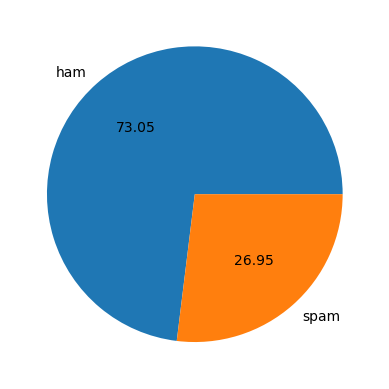

In [63]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
df.head()

,target,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize
0,1,10407,9,6,6,33088,262144,4,952
1,1,5354,9,6,6,33088,262144,4,952
2,1,58807,9,6,6,33088,262144,4,136490
3,1,25166,9,6,6,33088,262144,4,1940
4,1,70387,9,6,6,33088,262144,4,83098


In [64]:
# ham
df[df['target'] == 0][['AddressOfEntryPoint','MajorLinkerVersion','MajorImageVersion', 'MajorOperatingSystemVersion', 'DllCharacteristics', 'SizeOfStackReserve', 'NumberOfSections','ResourceSize']].describe()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize
count,8.804000e+03,8804.000000,8804.000000,8804.000000,8804.000000,8.804000e+03,8804.000000,8.804000e+03
mean,6.859802e+05,7.707065,21.230918,8.476374,14118.848137,1.194032e+06,4.845752,2.737636e+06
std,1.329299e+07,10.775030,620.570237,392.879912,16393.667701,1.154298e+06,3.493987,8.401996e+07
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
25%,1.294500e+04,6.000000,0.000000,4.000000,0.000000,1.048576e+06,3.000000,8.480000e+02
50%,6.019250e+04,8.000000,0.000000,4.000000,12.500000,1.048576e+06,4.000000,9.316500e+03
75%,2.375680e+05,9.000000,0.000000,5.000000,33024.000000,1.048576e+06,5.000000,6.762400e+04
max,1.074484e+09,255.000000,28619.000000,36868.000000,36864.000000,3.355443e+07,40.000000,4.294903e+09


In [65]:
#spam
df[df['target'] == 1][['AddressOfEntryPoint','MajorLinkerVersion','MajorImageVersion', 'MajorOperatingSystemVersion', 'DllCharacteristics', 'SizeOfStackReserve', 'NumberOfSections','ResourceSize']].describe()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize
count,2.386600e+04,23866.000000,23866.000000,23866.000000,23866.000000,2.386600e+04,23866.000000,2.386600e+04
mean,2.171621e+05,8.635088,226.177533,5.344716,7926.456046,5.522036e+05,4.375262,8.895835e+04
std,7.964132e+05,1.251941,2161.261713,0.833939,13851.474248,4.834519e+05,1.655257,2.224985e+06
min,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
25%,8.417000e+03,8.000000,0.000000,5.000000,320.000000,2.621440e+05,4.000000,9.320000e+02
50%,3.647000e+04,9.000000,6.000000,6.000000,320.000000,2.621440e+05,4.000000,1.100000e+03
75%,1.339370e+05,9.000000,6.000000,6.000000,1344.000000,1.048576e+06,5.000000,9.153500e+03
max,4.525109e+07,48.000000,21315.000000,10.000000,49504.000000,1.000000e+07,38.000000,3.124797e+08


In [66]:
import seaborn as sns

<Axes: xlabel='MajorLinkerVersion', ylabel='Count'>

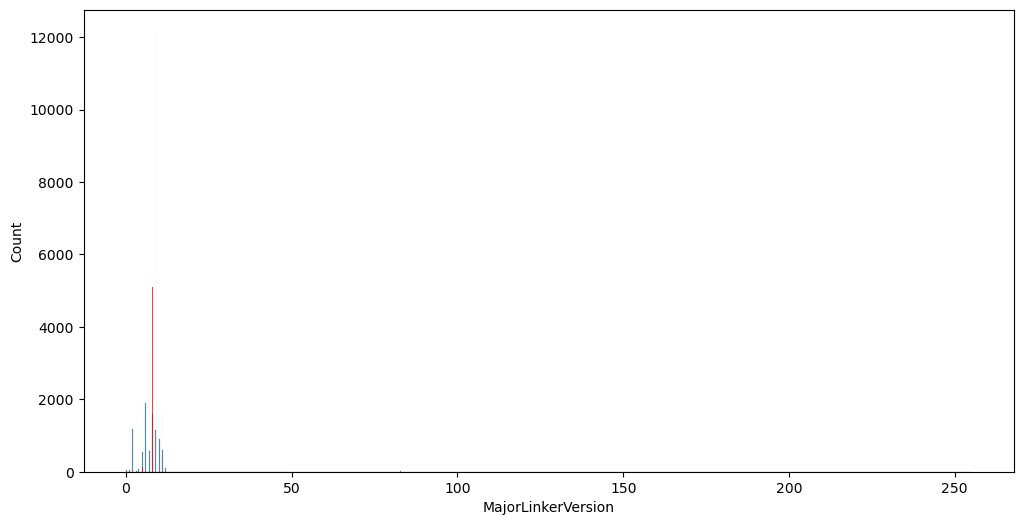

In [71]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['MajorLinkerVersion'])
sns.histplot(df[df['target'] == 1]['MajorLinkerVersion'],color='red')

<Axes: xlabel='MajorImageVersion', ylabel='Count'>

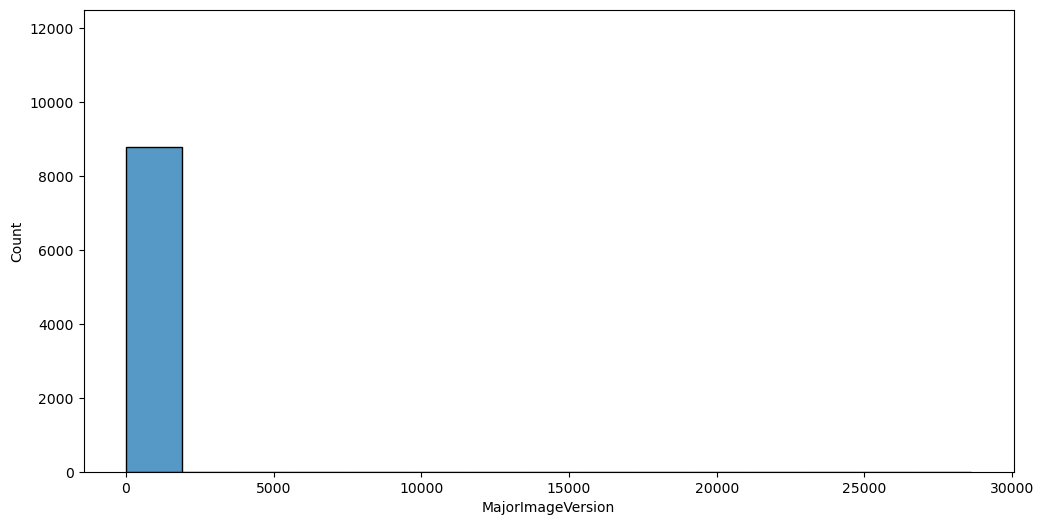

In [69]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['MajorImageVersion'])
sns.histplot(df[df['target'] == 1]['MajorImageVersion'],color='red')

<Axes: xlabel='SizeOfStackReserve', ylabel='Count'>

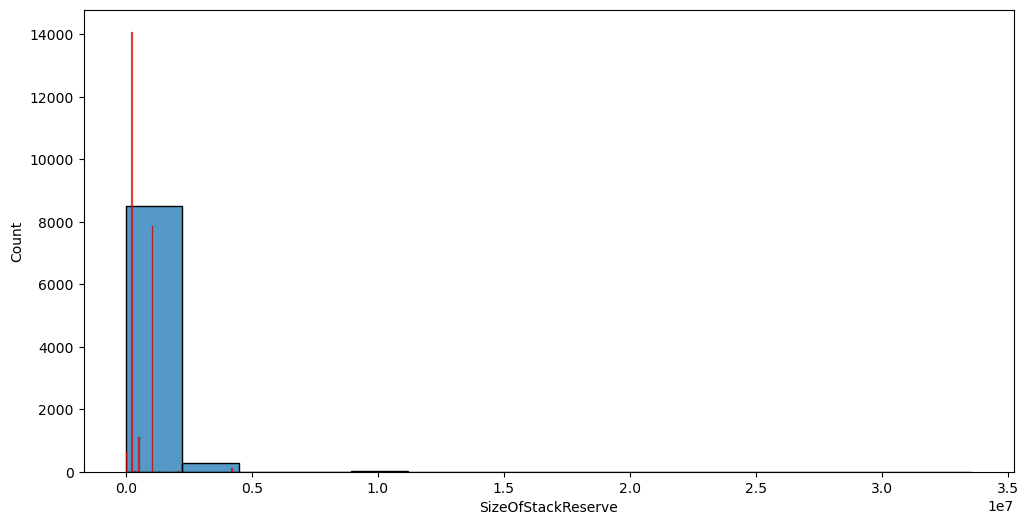

In [74]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['SizeOfStackReserve'])
sns.histplot(df[df['target'] == 1]['SizeOfStackReserve'],color='red')

<Axes: xlabel='NumberOfSections', ylabel='Count'>

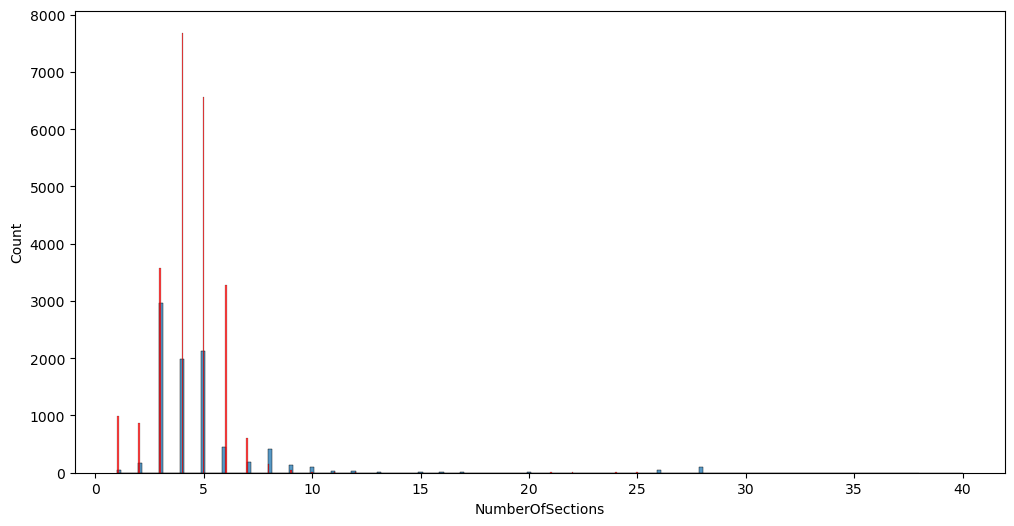

In [75]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['NumberOfSections'])
sns.histplot(df[df['target'] == 1]['NumberOfSections'],color='red')

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,target,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize
0,1,10407,9,6,6,33088,262144,4,952
1,1,5354,9,6,6,33088,262144,4,952
2,1,58807,9,6,6,33088,262144,4,136490
3,1,25166,9,6,6,33088,262144,4,1940
4,1,70387,9,6,6,33088,262144,4,83098


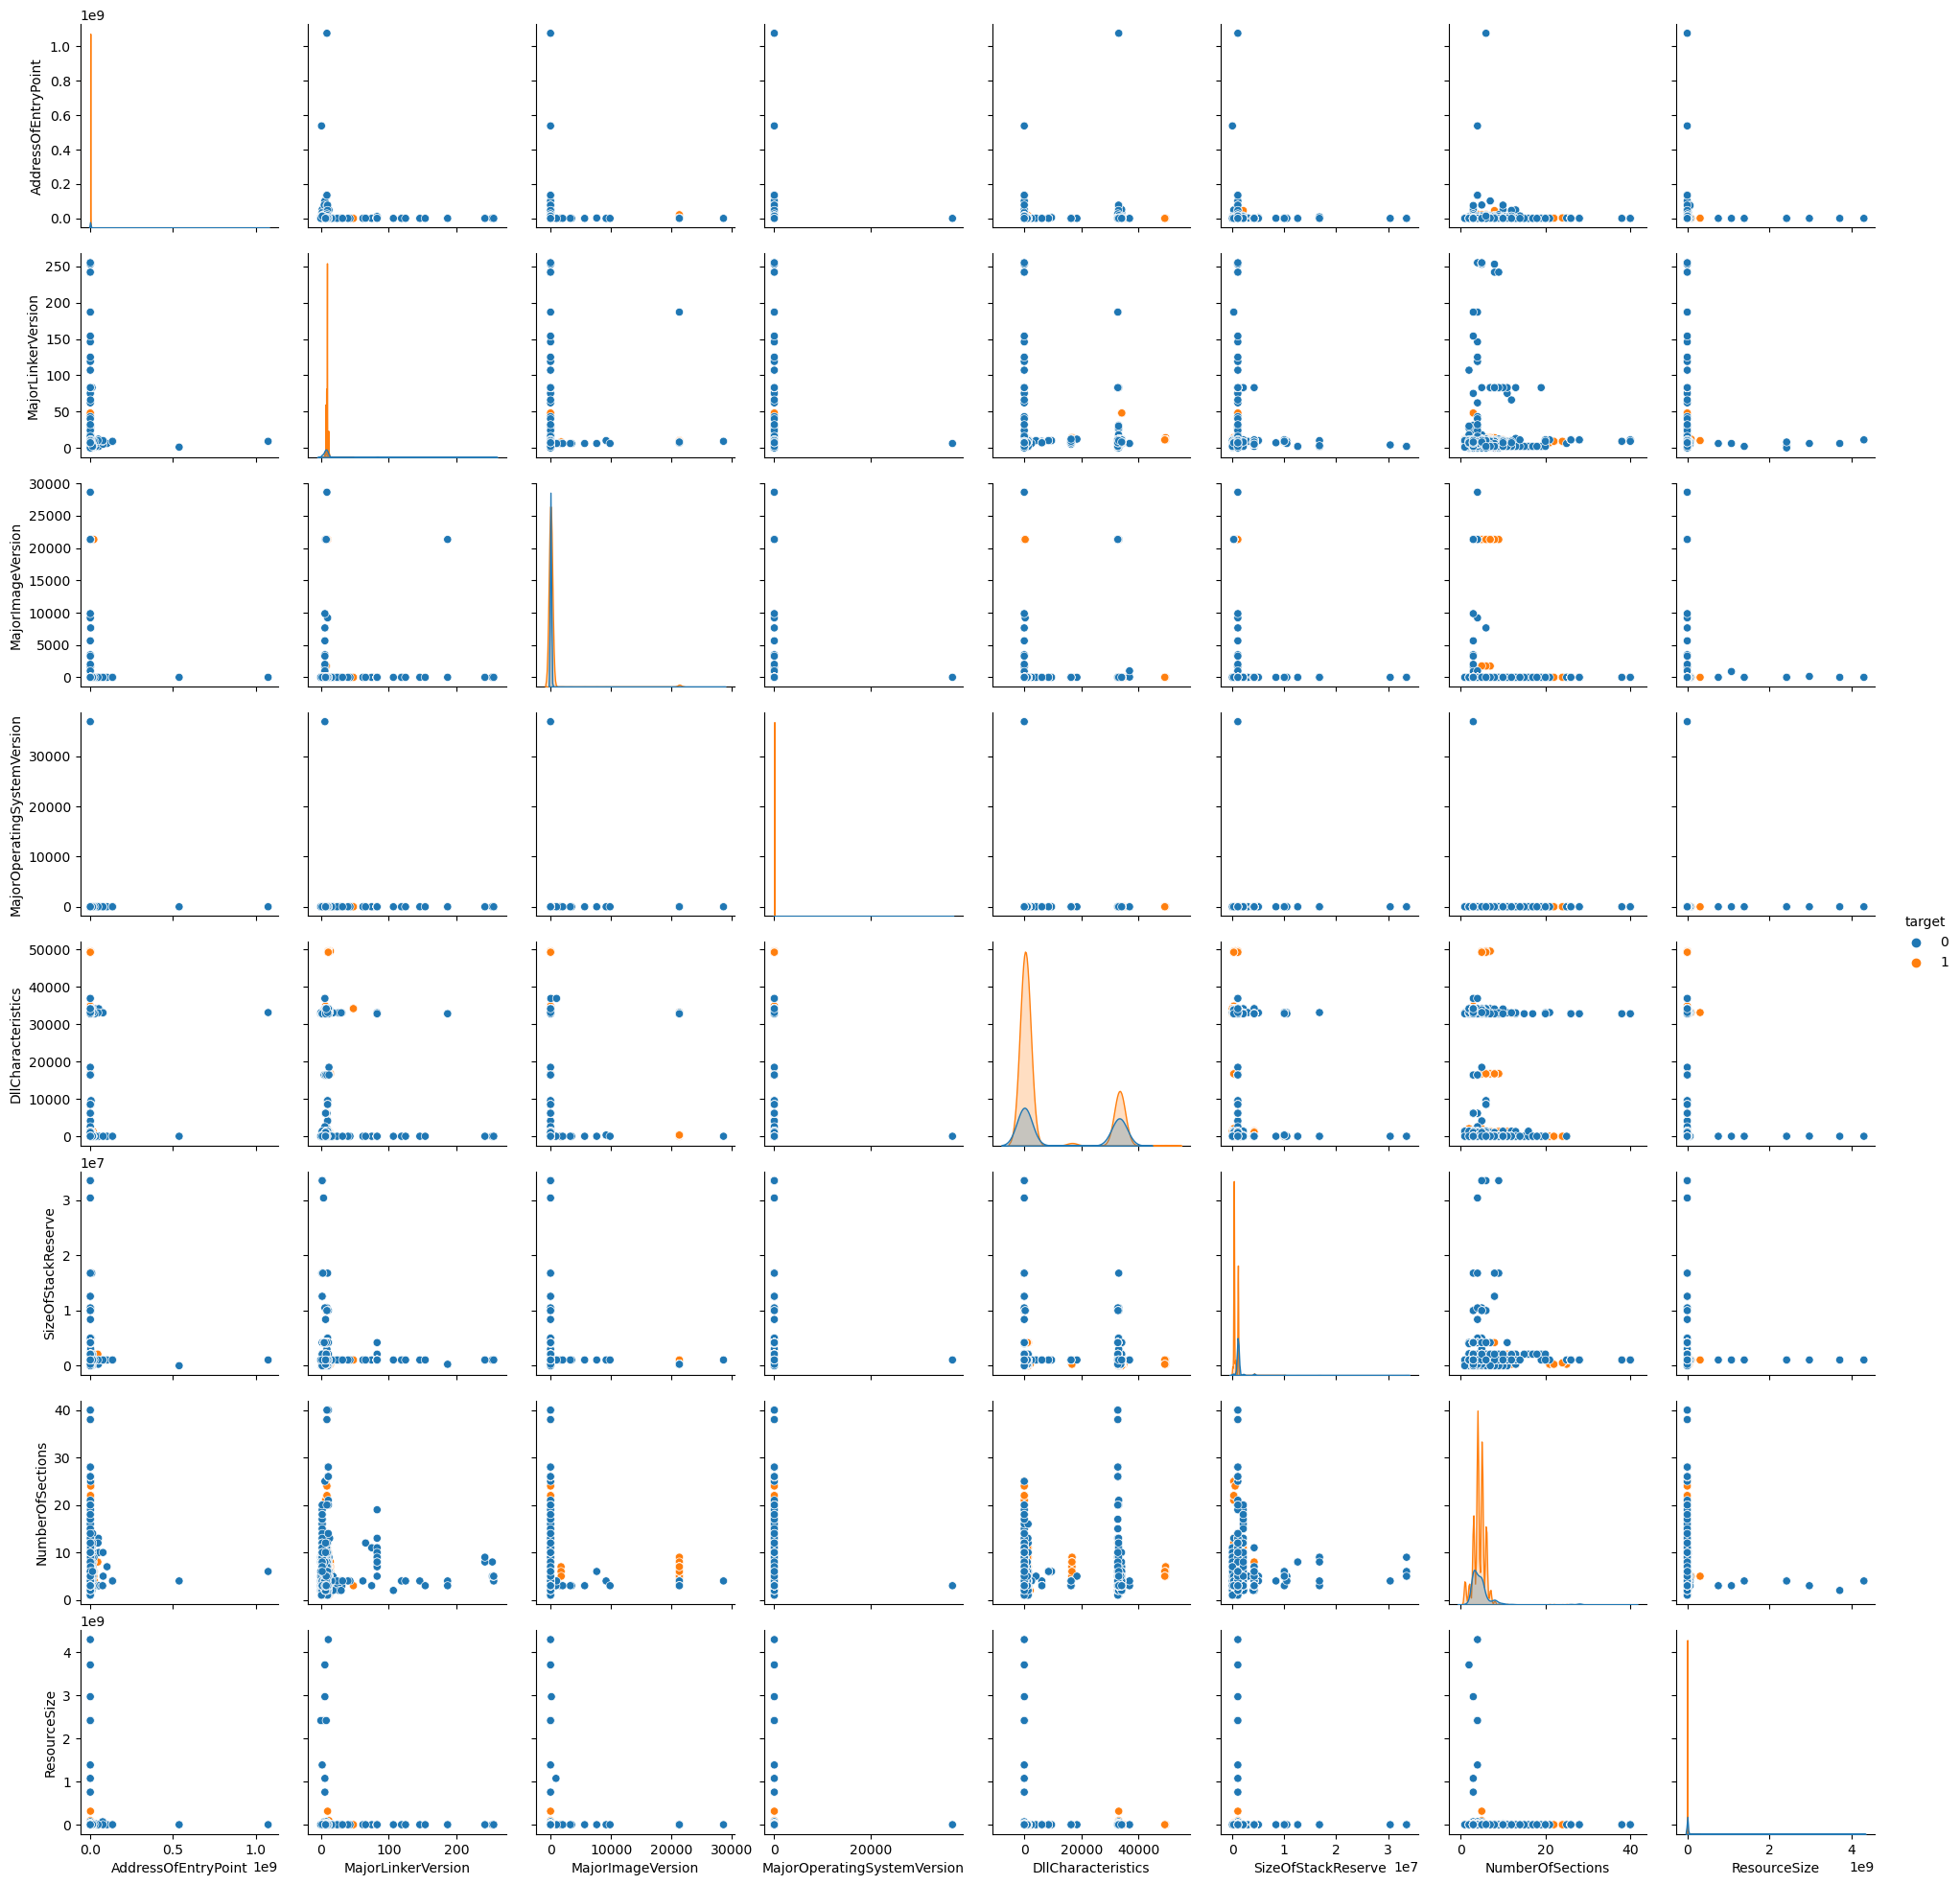

In [67]:
sns.pairplot(df,hue='target')
df.head()


<Axes: >

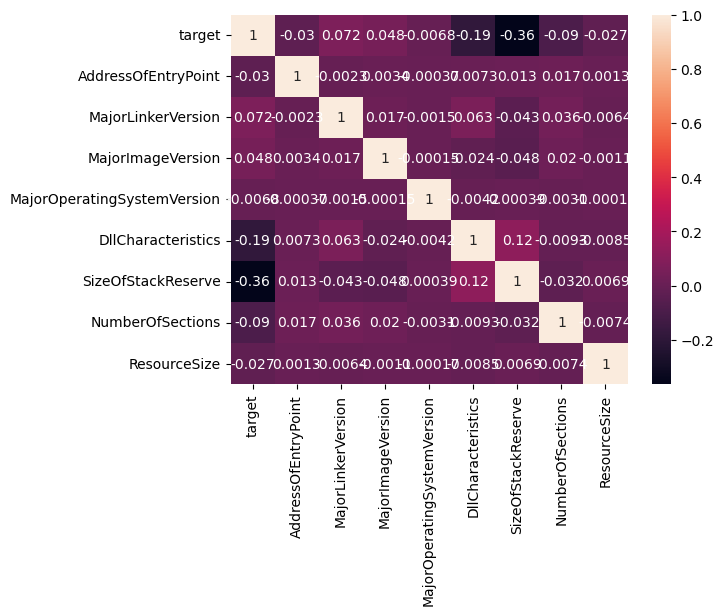

In [68]:

dfCorr = df[['target','AddressOfEntryPoint', 'MajorLinkerVersion', 'MajorImageVersion','MajorOperatingSystemVersion','DllCharacteristics','SizeOfStackReserve','NumberOfSections','ResourceSize']].corr()
sns.heatmap(dfCorr,annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [70]:
df.head()

,target,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize
0,1,10407,9,6,6,33088,262144,4,952
1,1,5354,9,6,6,33088,262144,4,952
2,1,58807,9,6,6,33088,262144,4,136490
3,1,25166,9,6,6,33088,262144,4,1940
4,1,70387,9,6,6,33088,262144,4,83098


## 4. Model Building

In [292]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [294]:
X.shape

(32670, 8)

In [295]:
y = df['target'].values

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [298]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [299]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [300]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7370676461585552
[[ 113 1632]
 [  86 4703]]
0.7423835832675612


In [301]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7229874502601775
[[ 131 1614]
 [ 196 4593]]
0.7399710004833253


In [329]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8183348637894092
[[ 765  980]
 [ 207 4582]]
0.8238043869111831


In [303]:
ets = ExtraTreesClassifier()
ets.fit(X_train,y_train)
y_pred4 = ets.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9580655035200489
[[1602  143]
 [ 131 4658]]
0.9702145386377838


In [250]:
# tfidf --> MNB

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [305]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [306]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [307]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [308]:
train_classifier(bnb,X_train,y_train,X_test,y_test)

(0.8183348637894092, 0.8238043869111831)

In [309]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7329354147535966
Precision -  0.7329354147535966
For  KN
Accuracy -  0.8887358432812978
Precision -  0.9177293294940354
For  NB
Accuracy -  0.7229874502601775
Precision -  0.7399710004833253
For  DT
Accuracy -  0.930976430976431
Precision -  0.9636596836254809
For  LR
Accuracy -  0.7894092439546985
Precision -  0.8216776625824693
For  RF
Accuracy -  0.9652586470768288
Precision -  0.974615064502705
For  AdaBoost
Accuracy -  0.9303642485460667
Precision -  0.9573659772055719
For  BgC
Accuracy -  0.9595959595959596
Precision -  0.9702764498025358
For  ETC
Accuracy -  0.9599020508111418
Precision -  0.9718574108818011
For  GBDT
Accuracy -  0.9410774410774411
Precision -  0.9616352201257862
For  xgb
Accuracy -  0.9589837771655954
Precision -  0.9716252868766951


In [310]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [311]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.965259,0.974615
8,ETC,0.959902,0.971857
10,xgb,0.958984,0.971625
7,BgC,0.959596,0.970276
3,DT,0.930976,0.963660
9,GBDT,0.941077,0.961635
6,AdaBoost,0.930364,0.957366
1,KN,0.888736,0.917729
4,LR,0.789409,0.821678
2,NB,0.722987,0.739971


In [312]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [313]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.965259
1,ETC,Accuracy,0.959902
2,xgb,Accuracy,0.958984
3,BgC,Accuracy,0.959596
4,DT,Accuracy,0.930976
5,GBDT,Accuracy,0.941077
6,AdaBoost,Accuracy,0.930364
7,KN,Accuracy,0.888736
8,LR,Accuracy,0.789409
9,NB,Accuracy,0.722987


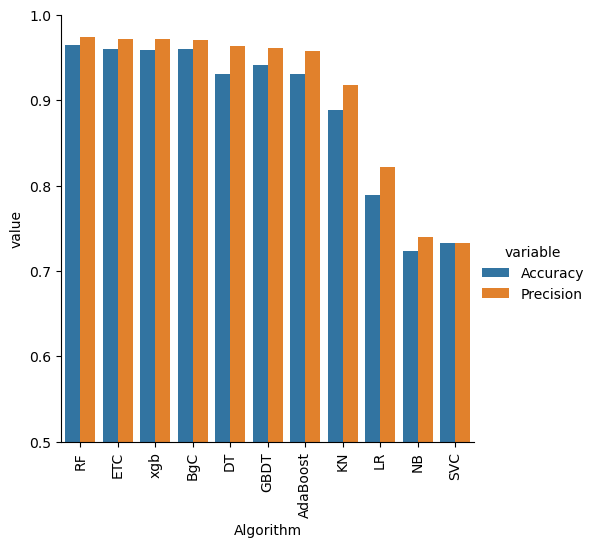

In [314]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [247]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [315]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [316]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [317]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [318]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [319]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [320]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.965259,0.974615,0.965259,0.974615,0.965259,0.974615,0.965259,0.974615
1,ETC,0.959902,0.971857,0.959902,0.971857,0.959902,0.971857,0.959902,0.971857
2,xgb,0.958984,0.971625,0.958984,0.971625,0.958984,0.971625,0.958984,0.971625
3,BgC,0.959596,0.970276,0.959596,0.970276,0.959596,0.970276,0.959596,0.970276
4,DT,0.930976,0.963660,0.930976,0.963660,0.930976,0.963660,0.930976,0.963660
5,GBDT,0.941077,0.961635,0.941077,0.961635,0.941077,0.961635,0.941077,0.961635
6,AdaBoost,0.930364,0.957366,0.930364,0.957366,0.930364,0.957366,0.930364,0.957366
7,KN,0.888736,0.917729,0.888736,0.917729,0.888736,0.917729,0.888736,0.917729
8,LR,0.789409,0.821678,0.789409,0.821678,0.789409,0.821678,0.789409,0.821678
9,NB,0.722987,0.739971,0.722987,0.739971,0.722987,0.739971,0.722987,0.739971


In [321]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [322]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [323]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [324]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.7516069788797062
Precision 0.74734375


In [325]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [326]:
from sklearn.ensemble import StackingClassifier



In [327]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [328]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9586776859504132
Precision 0.9720075203676625


In [330]:
import pickle
# pickle.dump(tfidf,open('vectorizer-malware.pkl','wb'))
pickle.dump(bnb,open('model-malware.pkl','wb'))